# **Collecting Data**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import shutil
import os

source = r'/content/gdrive/MyDrive/orange_new.zip'
destination = r'/tmp/orange.zip'
shutil.copyfile(source, destination)

'/tmp/orange.zip'

In [ ]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# **Explore Data and Preprocessing**

In [ ]:
path = r'/tmp/orange_new/orange/'
labels = os.listdir(path)
labels

['1', '3', '12', '7']

In [ ]:
#Check the number of images for each class and set
for label in labels:
  print(f"There are {len(os.listdir(path+label))} images in {label} days directory.")

There are 75 images in 1 days directory.
There are 293 images in 3 days directory.
There are 741 images in 12 days directory.
There are 470 images in 7 days directory.


In [ ]:
import os
from PIL import Image 
one_days = r'/tmp/orange_new/orange/1/'
three_days = r'/tmp/orange_new/orange/3/'
one_days_fnames = os.listdir(one_days)
three_days_fnames = os.listdir(three_days)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate= img.rotate(35).save(one_days+'rotated35'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate= img.rotate(80).save(one_days+'rotated70'+image)
            
for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(100).save(one_days+'rotated105'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(125).save(one_days+'rotated175'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(175).save(one_days+'rotated210'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(215).save(one_days+'rotated245'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(300).save(one_days+'rotated300'+image)

for image in three_days_fnames:  
  img = Image.open(three_days+image)
  rotate_img= img.rotate(270).save(three_days+'rotated270'+image)


In [ ]:
for label in labels:
  print(f"There are {len(os.listdir(path+label))} images in {label} days directory.")

There are 600 images in 1 days directory.
There are 586 images in 3 days directory.
There are 741 images in 12 days directory.
There are 470 images in 7 days directory.


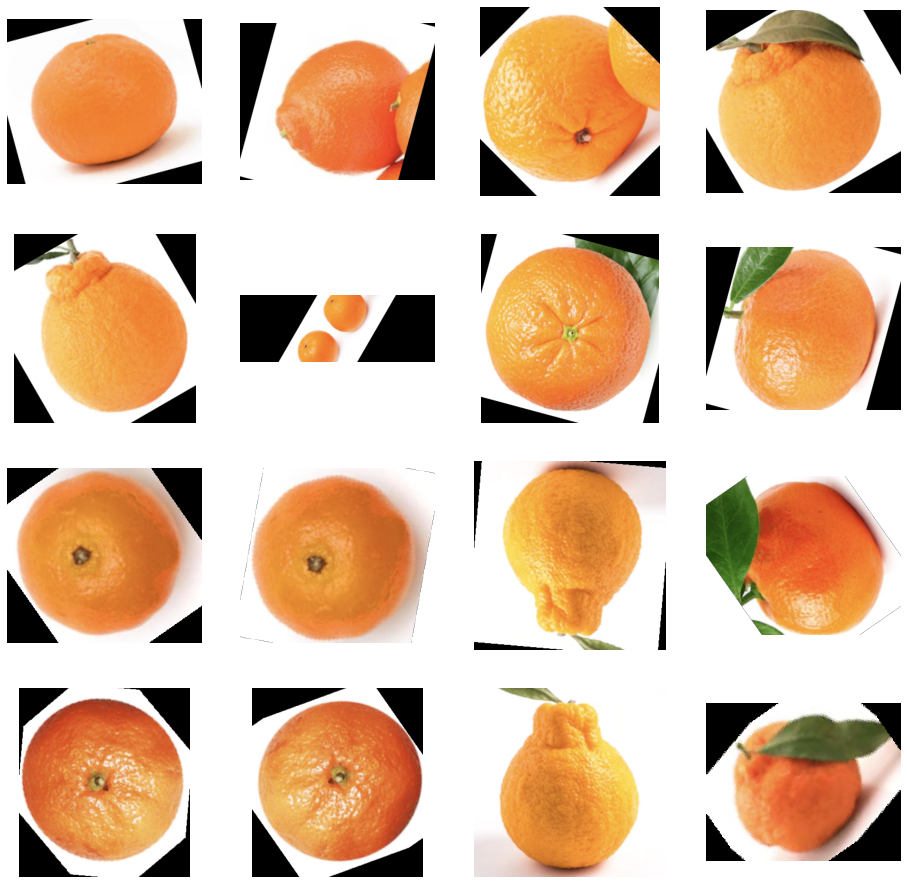

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_orange1_pix = [os.path.join('/tmp/orange_new/orange/1/', fname) 
                for fname in os.listdir('/tmp/orange_new/orange/1/')[ pic_index-8:pic_index] 
               ]
next_orange12_pix = [os.path.join('/tmp/orange_new/orange/12/', fname) 
                for fname in os.listdir('/tmp/orange_new/orange/12/')[ pic_index-8:pic_index] 
               ]
               
for i, img_path in enumerate(next_orange12_pix+next_orange1_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      validation_split=0.25)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.25)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(125, 125),#rev mentoring
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(125, 125),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1799 images belonging to 4 classes.
Found 598 images belonging to 4 classes.


# **Build model**

In [ ]:
# Hasil Edit Model ML Versi 1.0
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Tipe Model Transfer Learning ###

# Inception V3

pre_trained_model = InceptionV3(
    input_shape = (125, 125, 3),
    include_top = False,
)



# VGG16
"""
pre_trained_model = VGG16(
    input_shape = (100, 100, 3),
    include_top = False
)
"""

"""
# Xception
pre_trained_model = Xception(
    input_shape = (100, 100, 3),
    include_top = False
)
"""

# pre_trained_model.layers.pop()

### Tipe Freeze Layer ###

# Opsi 1
for layer in pre_trained_model.layers[:160]:
  layer.trainable = False
for layer in pre_trained_model.layers[160:]:
  layer.trainable = True

# Opsi 2
"""
for layer in pre_trained_model.layers[:-4]:
  layer.trainable = False
"""

### Tipe Last Output ###

# Opsi 1
# last_layer = pre_trained_model.get_layer('mixed7')
# x = layers.Flatten()(last_output)

# Opsi 2
# last_output = pre_trained_model.layers[-1].output
# x = layers.Flatten()(last_output)

# Opsi 3
x = layers.GlobalAveragePooling2D()
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)           
x = layers.Dense(4, activation='softmax')(x)


# Opsi 4
"""
x = layer.Dropout(0.2)(pre_trained_model.output)
x = layers.Flatten()(x)
x = layer.Dense(1024, activation = 'relu')(x)
x = layer.Dense(6, activation = 'softmax')(x)
"""

model = Model(pre_trained_model.input, x) 

model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 125, 125, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 62, 62, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                             

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [ ]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=80,
      validation_data=val_generator, 
      validation_steps=5, 
      callbacks=[modelcheck,callbacks],
      verbose=1)

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 2.2540 - accuracy: 0.3594
Epoch 1: val_accuracy improved from -inf to 0.33750, saving model to best_model.h5
20/20 [==============================] - 31s 446ms/step - loss: 2.2540 - accuracy: 0.3594 - val_loss: 9.9634 - val_accuracy: 0.3375
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.4278 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.33750
20/20 [==============================] - 6s 319ms/step - loss: 1.4278 - accuracy: 0.5000 - val_loss: 15.9525 - val_accuracy: 0.3313
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.1311 - accuracy: 0.5672
Epoch 3: val_accuracy improved from 0.33750 to 0.36875, saving model to best_model.h5
20/20 [==============================] - 7s 376ms/step - loss: 1.1311 - accuracy: 0.5672 - val_loss: 83.7272 - val_accuracy: 0.3688
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 0.9660 - accuracy: 0.6547
Epoch 4:

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

19/19 [==============================] - 6s 290ms/step - loss: 0.2950 - accuracy: 0.9047
Accuracy train:  0.9305169582366943
Accuracy test:  0.9046822786331177


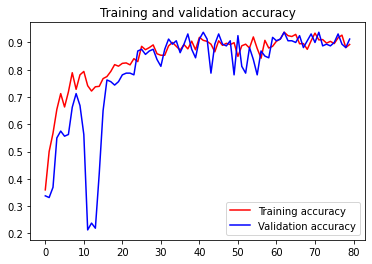

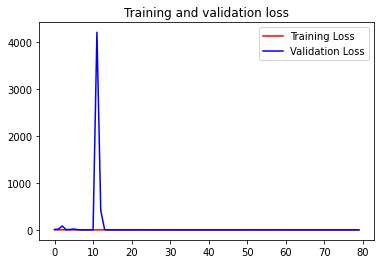

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Try test some images**

In [ ]:
#get index so we could know the order
train_generator.class_indices

{'1': 0, '12': 1, '3': 2, '7': 3}

Saving yellow-rotten-apple-one-yellow-rotten-apple-isolated-white-background-185075687.jpg to yellow-rotten-apple-one-yellow-rotten-apple-isolated-white-background-185075687.jpg
yellow-rotten-apple-one-yellow-rotten-apple-isolated-white-background-185075687.jpg
[[0.14114624 0.6242553  0.17990777 0.05469064]]
Resistance level = 7 days remaining (100% fresh)


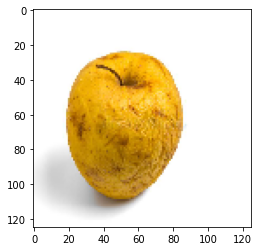

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(125,125))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)

 #refer to the class indices
  if classes[0,0] == 1.0:
    print('Resistance level = 1 days remaining (20% fresh)') 
  elif classes[0,1] == 1.0:
    print('Resistance level = 12 days remaining (100% fresh)') 
  elif classes[0,2] == 1.0:
    print('Resistance level = 3 days remaining (50% fresh)') 
  else:
    print('Resistance level = 7 days remaining (100% fresh)') 


# **Export Model**

In [ ]:
%cd /content/gdrive/MyDrive/Capstone_Project/Orange/Model_Orange_InceptionV3_Adam

/content/gdrive/MyDrive/Capstone_Project/Orange/Model_Orange_InceptionV3_Adam


In [ ]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\n Already saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


 Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 5320
drwxr-xr-x 2 root root    4096 Jun  5 12:06 assets
-rw-r--r-- 1 root root  646499 Jun  5 12:06 keras_metadata.pb
-rw-r--r-- 1 root root 4791531 Jun  5 12:06 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  5 12:06 variables


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

tflite_model = converter.convert()
tflite_model_file = 'Orange-durability-prediction.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Orange-durability-prediction.txt', 'w') as f:
    f.write('\n'.join(labels))

In [ ]:
try:
    files.download('Orange-durability-prediction.tflite')
    files.download('Orange-durability-prediction.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
saved_model_path = "./Orange-durability-prediction.h5"
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 40 kB 7.5 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} ./modeljs